In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grip-task1/GRIP_TASK1.csv
/kaggle/input/grip-task1/Iris_dataset.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Importing dataset and Exploring the data****

In [3]:
#importing the data
df = pd.read_csv("/kaggle/input/grip-task1/Iris_dataset.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#since we need to create the clusters ourselves, we'll drop the "Species" column

df.drop(["Species"],axis=1,inplace = True)

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# **Finding the optimal number of clusters**

Since we do not know the number of clusters we might need for proper classification, we will use an algorithm called **Elbow method** to find the optimal value of K in K means clustering. For elbow method we have to define 2 things:
1) Distortion:  It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

2) Inertia: It is the sum of squared distances of samples to their closest cluster center.
Now we iterate through a few values for our K and calculate the values of distortion and inertial for all the values of K in the range.

In [9]:
X = df.iloc[:, [1, 2, 3, 4]].values
distortion=[]
inertia=[]
mapping_1={}
mapping_2={}
K = range(1,11)


In [10]:
from tqdm import tqdm
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
for i in tqdm(K):
    #creating the model and fitting
    model = KMeans(n_clusters = i).fit(X)
    model.fit(X)
    distortion.append(sum(np.min(cdist(X, model.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertia.append(model.inertia_)
    mapping_1[i] = sum(np.min(cdist(X, model.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping_2[i] = model.inertia_
    

100%|██████████| 10/10 [00:00<00:00, 12.62it/s]


**Visualizing the results**

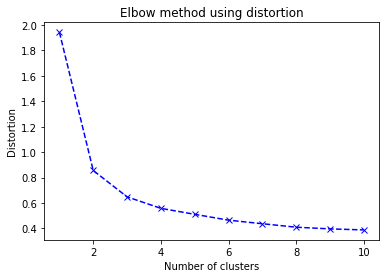

In [11]:
plt.plot(K,distortion,'bx--')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.title("Elbow method using distortion")
plt.show()

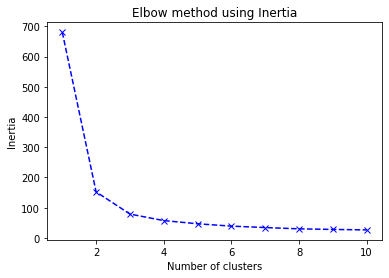

In [12]:
plt.plot(K,inertia,'bx--')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method using Inertia")
plt.show()

Thus from both the Elbow methods, we can conclude that the optimal number of clusters is 3. Thus k=3 for our Kmeans cluster model.

# **Model**

In [13]:
#applying Kmeans classifier to the dataset

k_model = KMeans(n_clusters=3)
y_kmean = k_model.fit_predict(X)

In [14]:
#viewing our classification array
y_kmean

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [15]:
#co-ordiantes of cluster centers

k_model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

# **Visulaizing the clusters**

[]

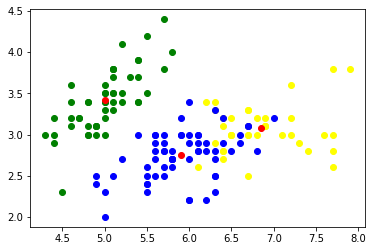

In [16]:
#plotting the clusters
plt.scatter(X[y_kmean==0,0],X[y_kmean==0,1],c='yellow')
plt.scatter(X[y_kmean==1,0],X[y_kmean==1,1],c='green')
plt.scatter(X[y_kmean==2,0],X[y_kmean==2,1],c='blue')

#plotting the centers
plt.scatter(k_model.cluster_centers_[:,0],k_model.cluster_centers_[:,1],c='red')

plt.plot()

**3D Scatter plot for better understanding**

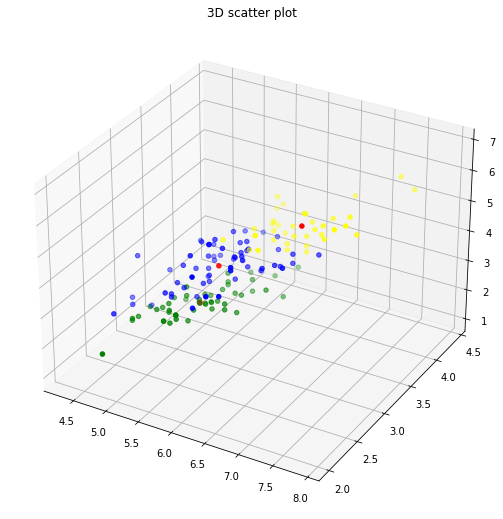

In [17]:
# Import libraries
from mpl_toolkits import mplot3d
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[y_kmean==0,0],X[y_kmean==0,1],X[y_kmean==0,2] ,c = "yellow")
ax.scatter3D(X[y_kmean==1,0],X[y_kmean==1,1],X[y_kmean==1,2] ,c = "green")
ax.scatter3D(X[y_kmean==2,0],X[y_kmean==2,1],X[y_kmean==2,2] ,c = "blue")

#cluster centers
ax.scatter3D(k_model.cluster_centers_[:,0],k_model.cluster_centers_[:,1],k_model.cluster_centers_[:,2],c='red')
plt.title("3D scatter plot")
 
# show plot
plt.show()